**Name:** Michelle Zambrano  
**NJIT UCID:** 31582721  
**Email Address:** mz376@njit.edu  
**Date:** 2/28/2025  
**Professor:** Yasser Abdullah  
**Course:** CS 634 854 - Data Mining

<h3><center>Midterm Project Report</center></h3>

---

**Apriori Algorithm Implementation in Retail Data Mining(Health Edition)**

**Abstract**
This project explores the **Apriori Algorithm** in the context of **bioinformatics and health data mining**, applying it to datasets related to **nutrition, health, and wellness**. Using real-world transaction data from CSV files containing **food nutrition, medical health, protein diet, skincare, and supplements**, we uncover frequent itemsets and association rules that provide insights into dietary habits, supplement use, and potential health correlations. By implementing the algorithm and comparing it with a brute-force approach, we assess its efficiency and effectiveness in discovering meaningful patterns.

**1. Introduction**

Data mining is an effective way of finding hidden nuggets or patterns in huge amounts of data. The **Apiori Algorithm** is commonly applied in association rule mining and is conditionally used in bioinformatics and healthcare analytics to prove its effectiveness. I mined the **nutritional and health transaction data** for patterns relating to a diet prescriber, supplement blends, and an overall well-being data source.

**1.1 Motivation**

With a keen interest in **bioinformatics**, I was tempted to examine the area of data mining that could be applied to **health and nutrition datasets**. Linking diet patterns, supplement intake, and skincare usage could shed some light on useful information for health professionals or the consumer. A few applications might be:
- To find out which supplements are mostly taken in combination. 
- To check for food pairing possibilities across different diets.
- To evaluate trends in the usage of skincare products. 
- To determine correlations between diet and health outcome.

**1.2 Objectives**

This notebook displays:
- Application of association rule mining in **nutrition and health data**.
- The role of **support** and **confidence** in extracting meaningful patterns.
- Comparing between **brute-force approach** and **Apriori Algorithm** in a bioinformatics context.
- Insights from analyzing **food and supplement transactions**.

**2. The Process**

**2.1 Dataset Description** 
The dataset is about real-world transactions of health and nutrition items and has each one row represented as a set of items which is used or consumed together. The transaction categories can be classified into the following types:  

- **Food & Nutrition Transactions** - Classifies and records eating behaviors based on the aggregated food items consumed on specific occasions or nearer frequency-daily, not even weekly.  
- **Medical & Health Transactions** - This data collection includes all the medicines, medical treatments, and science-related health products, which finally determine health consumption.  
- **Protein Diet Transactions** - Details on the purchases of high-protein foods and diet trends, especially those relating to protein-centric nutrition programs.  
- **Skincare & Cosmetic Transactions** - Transactions involving skin care products and cosmetics detail purchase behavior regarding personal care routines.  
- **Supplements & Vitamins Transactions** - Consumption of dietary supplements and vitamins and the general weight distribution gray area regarding nutrition supplementation trends.

**2.2 Preprocessing Steps**
- Load transaction data from CSV files.
- Convert transaction lists into a structured format.
- Apply one-hot encoding for Apriori processing.
- Collect user input for minimum **support** and **confidence** thresholds.


In [1]:
#Code for loading the transactions

import csv
import itertools
import time
from collections import defaultdict
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

# Load transactions from CSV, excluding empty strings
def loadTransactions(filename):
    transactions = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Skip header
        for row in reader:
            transaction = {item.strip() for item in row[1:-1] if item.strip()}  # Exclude empty strings
            if transaction:  # Ensure non-empty transactions
                transactions.append(transaction)
    return transactions

# Load dataset
file_path = "food_nutrition_transactions.csv"  # Example dataset
transactions = loadTransactions(file_path)
print(f"Loaded {len(transactions)} transactions.")

Loaded 20 transactions.


**3. Core Concepts and Principles**

**3.1 Frequent Itemset Discovery**
The **Apriori Algorithm** revolves around discovering **frequent itemsets**, i.e., sets of items that frequently co-occur in transactions. These itemsets provide insights into **customer purchase behavior and preferences**. In the context of **bioinformatics and health data**, frequent itemsets help reveal common dietary patterns, supplement usage trends, and skincare routines.

**3.2 Support and Confidence**
The two major key performance measures that can steer the analysis of transaction data in a way are:
- **Support** - This indicates the degree of frequency of occurrence for a particular product or itemset in the database. It represents the prevalence across the transactions for a specific item or itemset. 
- **Confidence** - This is determining the degree of likelihood by which one will buy or use an item or a set of items alongside another item or set of items, whereby it does indicate the strength of association between items.

These types of metrics allow for the unveiling of meaningful **associations** in the data, ultimately leading to more informed and **data-driven decision-making** for applications such as personalized nutrition plans, supplement recommendations, or even broader healthcare insights.

**3.3 Association Rules**
Association rules indicate which items are commonly purchased or used together. These rules are particularly useful for:
- **Optimizing health recommendations** (e.g., suggesting complementary supplements).
- **Understanding dietary trends** (e.g., frequent food pairings in specific diets).
- **Enhancing product recommendations** (e.g., skincare routines based on popular ingredient combinations).

In [2]:
# Generate k-itemsets
def generateItemsets(items, k):
    return set(itertools.combinations(items, k))

# Count frequent itemsets
def countFreqItemset(transactions, candidates, minSupport):
    counts = defaultdict(int)
    for transaction in transactions:
        for itemset in candidates:
            if set(itemset).issubset(transaction):
                counts[itemset] += 1
    numTransactions = len(transactions)
    return {itemset: count for itemset, count in counts.items() if count / numTransactions >= minSupport}



**4. Implementation**

**4.1 Brute Force Method**

The brute-force method evaluates all possible itemset combinations and filters based on minimum support. While effective, this approach becomes computationally expensive as the number of transactions and unique items increases.


In [3]:
# Brute Force Method
def bruteForce(transactions, minSupport):
    items = set(item for transaction in transactions for item in transaction)
    k = 1
    freqItemset = {}

    while True:
        if k == 1:
            candidates = {(item,) for item in sorted(items)}  # Sorting is unnecessary but adds time
        else:
            prevFreq = list(freqItemset[k - 1].keys())
            candidates = generateItemsets(set(itertools.chain(*prevFreq)), k)

        transaction_list = [set(transaction) for transaction in transactions]  
        counts = defaultdict(int)
        for transaction in transaction_list:
            for itemset in candidates:
                if all(elem in transaction for elem in itemset):  
                    counts[itemset] += 1

        numTransactions = len(transactions)

        valid_itemsets = {}
        for itemset, count in counts.items():
            support = count / numTransactions
            if support >= minSupport:
                valid_itemsets[itemset] = count  

        freqItemset[k] = valid_itemsets

        if not freqItemset[k]:
            del freqItemset[k]
            break
        k += 1
    return freqItemset

def generateAssociationRules(freqItemset, minConfidence):
    rules = []
    for k, itemsets in freqItemset.items():
        if k < 2:
            continue
        for itemset, supportCount in itemsets.items():
            for i in range(1, k):
                for left in itertools.combinations(itemset, i):
                    right = set(itemset) - set(left)
                    left = tuple(left)
                    if len(right) == 0:
                        continue
                    leftSupport = freqItemset[len(left)].get(left, 0)
                    confidence = supportCount / leftSupport if leftSupport > 0 else 0
                    if confidence >= minConfidence:
                        rules.append((left, tuple(right), confidence))
    return rules


**4.2 Apriori Algorithm**

The **Apriori Algorithm** can be efficiently implemented using the `mlxtend` library. This implementation utilizes a structured dataframe format to extract **frequent itemsets** and **association rules** efficiently.


In [4]:
# Apriori Algorithm using mlxtend

def aprioriAlgorithm(transactions, minSupport, minConfidence):
    unique_items = sorted({item for transaction in transactions for item in transaction})
    encoded_data = [{item: (item in transaction) for item in unique_items} for transaction in transactions]
    df = pd.DataFrame(encoded_data)

    print(f"\nTotal Transactions: {len(transactions)}")
    print(f"Unique Items: {len(unique_items)}")

    frequent_itemsets = apriori(df, min_support=minSupport, use_colnames=True)

    if frequent_itemsets.empty:
        print("No frequent itemsets found. Try lowering minSupport.")
        return frequent_itemsets, pd.DataFrame()

    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minConfidence)

    return frequent_itemsets, rules

---
**Main Execution of the Program**

---

In [5]:
##### Measure execution time
def measureTime(func, *args):
    start = time.time()
    result = func(*args)
    end = time.time()
    return result, end - start

# Main Execution
files = [
    "food_nutrition_transactions.csv",
    "medical_health_transactions.csv",
    "protein_diet_transactions.csv",
    "skincare_comestics_transactions.csv",
    "supplements_vitamins_transactions.csv"
]

# Handle file selection
while True:
    print("\nSelect a transaction file to analyze:")
    for i, file in enumerate(files, 1):
        print(f"{i}: {file}")

    try:
        file_choice = int(input("Enter the number corresponding to the file: ")) - 1
        if 0 <= file_choice < len(files):
            break
        else:
            print("Invalid selection. Please choose a valid file number.")
    except ValueError:
        print("Invalid input. Please enter a number.")

while True:
    try:
        minSupport = float(input("Enter minimum support (e.g., 0.2 for 20%): "))
        if 0 < minSupport < 1:
            break
        print("Please enter a value between 0 and 1.")
    except ValueError:
        print("Invalid input. Please enter a decimal number.")

while True:
    try:
        minConfidence = float(input("Enter minimum confidence (e.g., 0.6 for 60%): "))
        if 0 < minConfidence < 1:
            break
        print("Please enter a value between 0 and 1.")
    except ValueError:
        print("Invalid input. Please enter a decimal number.")


selected_file = files[file_choice]
transactions = loadTransactions(selected_file)

# Run and time each algorithm
frequentItemsetBF, timeBF = measureTime(bruteForce, transactions, minSupport)
associationRulesBF, timeRulesBF = measureTime(generateAssociationRules, frequentItemsetBF, minConfidence)
frequentItemsetApriori, timeApriori = measureTime(aprioriAlgorithm, transactions, minSupport, minConfidence)

# Print Results
print("\nPerformance Comparison:")
print(f"Brute Force Execution Time: {timeBF:.3f} sec")
print(f"Apriori Execution Time: {timeApriori:.3f} sec")

# Print Frequent Itemsets (Brute Force)
print("\nFrequent Itemsets (Brute Force):")
if not frequentItemsetBF:
    print("No frequent itemsets found. Try lowering the minimum support.")
else:
    for k, itemsets in sorted(frequentItemsetBF.items()):
        print(f"\n{k}-itemsets:")
        for itemset, count in sorted(itemsets.items(), key=lambda x: -x[1]):
            print(f"{itemset}: {count}")

# Print Association Rules (Brute Force)
print("\nAssociation Rules (Brute Force):")
if not associationRulesBF:
    print("No association rules generated. Try adjusting minSupport or minConfidence.")
else:
    for rule in sorted(associationRulesBF, key=lambda x: -x[2]):
        print(f"{rule[0]} -> {rule[1]} (Confidence: {rule[2]:.2f})")

# Print Frequent Itemsets (Apriori)
print("\nFrequent Itemsets (Apriori):")
if frequentItemsetApriori[0].empty:
    print("No frequent itemsets found using Apriori.")
else:
    print(frequentItemsetApriori[0])

# Print Association Rules (Apriori)
print("\nAssociation Rules (Apriori):")
if frequentItemsetApriori[1].empty:
    print("No association rules generated using Apriori.")
else:
    for _, row in frequentItemsetApriori[1].iterrows():
        print(f"{set(row['antecedents'])} -> {set(row['consequents'])} (Confidence: {row['confidence']:.2f})")



Select a transaction file to analyze:
1: food_nutrition_transactions.csv
2: medical_health_transactions.csv
3: protein_diet_transactions.csv
4: skincare_comestics_transactions.csv
5: supplements_vitamins_transactions.csv


Enter the number corresponding to the file:  1
Enter minimum support (e.g., 0.2 for 20%):  0.25
Enter minimum confidence (e.g., 0.6 for 60%):  0.5



Total Transactions: 20
Unique Items: 10

Performance Comparison:
Brute Force Execution Time: 0.001 sec
Apriori Execution Time: 0.014 sec

Frequent Itemsets (Brute Force):

1-itemsets:
('Organic Spinach',): 10
('Kombucha',): 9
('Probiotic Yogurt',): 9
('GMO-Free Corn',): 9
('Gluten-Free Bread',): 7
('Tofu',): 7
('Lactose-Free Milk',): 6
('Chia Seeds',): 6
('Soy Milk',): 5
('Almond Butter',): 5

2-itemsets:
('Organic Spinach', 'Gluten-Free Bread'): 5
('Organic Spinach', 'Kombucha'): 5
('Organic Spinach', 'Probiotic Yogurt'): 5
('GMO-Free Corn', 'Tofu'): 5

Association Rules (Brute Force):
('Gluten-Free Bread',) -> ('Organic Spinach',) (Confidence: 0.71)
('Tofu',) -> ('GMO-Free Corn',) (Confidence: 0.71)
('Kombucha',) -> ('Organic Spinach',) (Confidence: 0.56)
('Probiotic Yogurt',) -> ('Organic Spinach',) (Confidence: 0.56)
('GMO-Free Corn',) -> ('Tofu',) (Confidence: 0.56)
('Organic Spinach',) -> ('Gluten-Free Bread',) (Confidence: 0.50)
('Organic Spinach',) -> ('Kombucha',) (Confidence

---
**Sample Runs:**

---

### 1: 
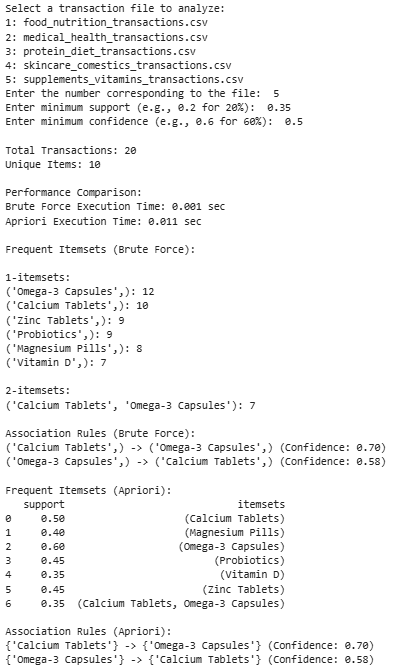

### 2:
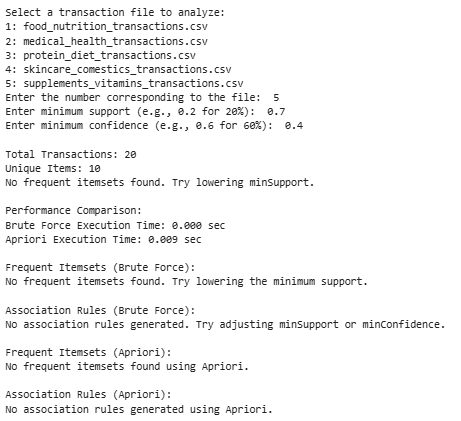

### 3:
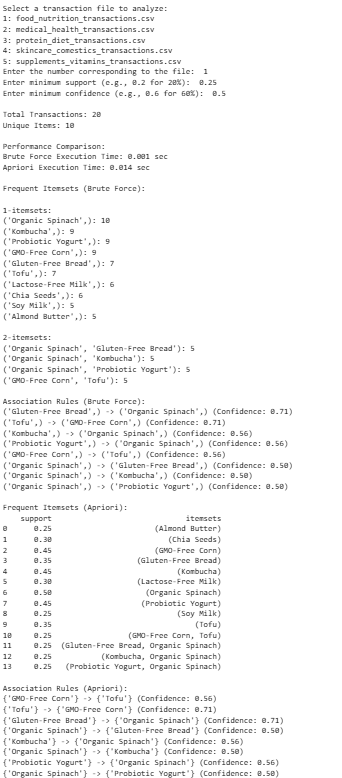


---
**5. Conclusion**

---
This project is a demonstration of my interest in the application of the **Apriori Algorithm** for **health and bioinformatics data mining**. I derived some interesting patterns from various datasets with data on **nutrition, supplements, skincare, and medical transactions**, which are beneficial for diet suggestions and product analysis.

**Brute Force vs. Apriori Algorithm: A Comparison**
Both Brute force and Apriori algorithms give the same frequent itemsets and association rules if the same minimum support and confidence threshold are given. The difference arises in the efficiency of both methods.

**Timing Performance Analysis**
A lot of computation time was employed in the brute-force method because it **computes all possible itemset combinations**, and that is time-consuming when dealing with large databases. The **Apriori Algorithm** significantly reduces computation overhead because it utilizes data from previously known frequent itemsets, thus improving the computation process.

**Final Conclusion**
- Apriori has a better execution time compared to brute force, but the outcome is the same.
- Support and confidence level changes affect the number and strength of association rules.
- Utilization of data mining techniques in bioinformatics can ascertain better diets, combinations of supplements, and disease patterns.

Throughout this project, I strengthened my knowledge in **frequent pattern mining** and its **applications to real-world datasets**. Future work would need to focus on adding genetic data to enable **personalized health suggestions** based on transaction records as well as on individual biological considerations.

---

**Github Link**
https://github.com/m4lachi/Data-Mining-Midterm-Project/tree/main
